In [1]:
import networkx as nx
import nxviz as nv
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/home/qtran/anaconda3/lib/python3.8/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.3 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.3, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


In [2]:
df = pd.read_excel('ryai190138_appendixe1.xlsx')
dfg = df[['T1_fx-g', 'T2_fx-g', 'T3_fx-g', 'T4_fx-g',
       'T5_fx-g', 'T6_fx-g', 'T7_fx-g', 'T8_fx-g', 'T9_fx-g', 'T10_fx-g',
       'T11_fx-g', 'T12_fx-g', 'L1_fx-g', 'L2_fx-g', 'L3_fx-g', 'L4_fx-g',
       'L5_fx-g', 'L6_fx-g']]

dfs = df[['T1_fx-s', 'T2_fx-s', 'T3_fx-s', 'T4_fx-s',
       'T5_fx-s', 'T6_fx-s', 'T7_fx-s', 'T8_fx-s', 'T9_fx-s', 'T10_fx-s',
       'T11_fx-s', 'T12_fx-s', 'L1_fx-s', 'L2_fx-s', 'L3_fx-s', 'L4_fx-s',
       'L5_fx-s', 'L6_fx-s']]

df.columns

/home/qtran/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Index(['verse_ID', 'subject_ID', 'dataset', 'age_ct', 'CT_device', 'Res',
       'BMD', 'DXA T-value', 'CT_image_series', 'N_vertebrae',
       'foreign_material', 'N_Fx', 'T1_fx-g', 'T2_fx-g', 'T3_fx-g', 'T4_fx-g',
       'T5_fx-g', 'T6_fx-g', 'T7_fx-g', 'T8_fx-g', 'T9_fx-g', 'T10_fx-g',
       'T11_fx-g', 'T12_fx-g', 'L1_fx-g', 'L2_fx-g', 'L3_fx-g', 'L4_fx-g',
       'L5_fx-g', 'L6_fx-g', 'T1_fx-s', 'T2_fx-s', 'T3_fx-s', 'T4_fx-s',
       'T5_fx-s', 'T6_fx-s', 'T7_fx-s', 'T8_fx-s', 'T9_fx-s', 'T10_fx-s',
       'T11_fx-s', 'T12_fx-s', 'L1_fx-s', 'L2_fx-s', 'L3_fx-s', 'L4_fx-s',
       'L5_fx-s', 'L6_fx-s'],
      dtype='object')

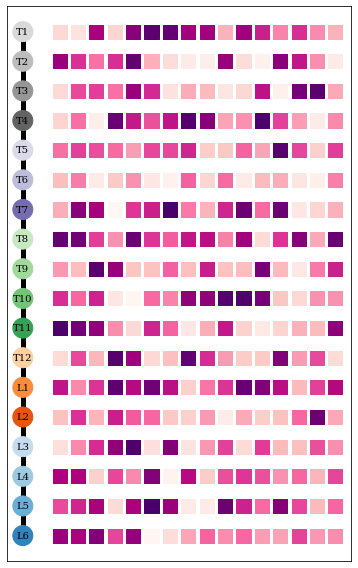

In [3]:
Gs = nx.grid_2d_graph( 1, 18) # Spine with 18 nodes
Gf = nx.grid_2d_graph(16, 18) # Each node has 16 features

names = ["T1", "T2", "T3", "T4", "T5", "T6", "T7", "T8", "T9", "T10", "T11", "T12", 
         "L1", "L2", "L3", "L4", "L5", "L6"]
# labels = dict(((0, 18-k), v) for k, v in enumerate(names))

def draw_grid(Gs, Gf, ax=None):
    # if ax is None:
    #     fig, ax = plt.subplots(1, 2, figsize=(6, 10))
    # else:
    #     fig = None

    # Draw the spine so that it is behind the features
    fig, _ = plt.subplots(1, 2, figsize=(10, 8), gridspec_kw={'width_ratios': [1, 3]})
    ax = plt.subplot(1, 2, 1)
    
    node_color = []
    node_label = {}
    for i, n in enumerate(Gs):
        node_color.append(i/20.)
        node_label[n] = Gs.nodes[n].get('label', n)

    edge_color = []
    edge_width = []
    for i, e in enumerate(Gs.edges()):
        edge_color.append(Gs.edges[e].get('color', 'black'))
        edge_width.append(Gs.edges[e].get('width', 1))

    pos = dict(zip(Gs,Gs))
    nx.draw_networkx_edges(Gs, pos=pos, 
        edge_color=edge_color, 
        # alpha=1, 
        # ax=ax, 
        width=5
    )
    nx.draw_networkx_nodes(Gs, pos=pos, 
        node_color=node_color, 
        cmap=plt.cm.tab20c, #PiYG,
        # label=node_label,
        # alpha=1, 
        # ax=ax, 
        node_shape='o', 
        node_size=400
    )
    fig.tight_layout()
    # ax.axis('off')
    # ax.autoscale()

    # Draw the labels
    labels = dict((n, s) for n, s in zip(Gs, reversed(names)) )
    nx.draw_networkx_labels(Gs, pos, labels, 
        font_size=10, 
        font_color='black', 
        font_family='serif'
        # font_color="whitesmoke"
        )

    # Draw the features
    # ax = plt.subplot(1, 2, 2)
    
    node_color = []
    node_label = {}
    for i, n in enumerate(Gf):
        node_color.append(np.random.rand(1))
        node_label[n] = Gf.nodes[n].get('label', n)

    edge_color = []
    edge_width = []
    for i, e in enumerate(Gf.edges()):
        edge_color.append(Gf.edges[e].get('color', 'black'))
        edge_width.append(Gf.edges[e].get('width', 1))


    # nx.draw_networkx_edges(Gf, pos=dict(zip(Gf,Gf)), 
    #     edge_color=edge_color, 
    #     # alpha=1, 
    #     # ax=ax, 
    #     width=5
    # )
    pos = dict(zip(Gf,Gf))
    pos = {k: (v[0]+2., v[1]) for k, v in pos.items()}
    nx.draw_networkx_nodes(Gf, pos=pos,
        node_color=node_color, 
        cmap=plt.cm.RdPu, #PiYG, #RdPu,
        # alpha=1, 
        # ax=ax, 
        node_shape='s', 
        node_size=200
    )
    fig.tight_layout()
    # ax.axis('off')
    # ax.autoscale()

draw_grid(Gs, Gf)